In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import warnings
from itertools import islice

In [2]:
warnings.filterwarnings("ignore")

In [3]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [5]:
pd.set_option('display.max_rows', None) #if activated avoid runing a cell to show a whole df, use head()

In [6]:
url = "clust_data_nextbike_2020-07.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [7]:
df.head()

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
0  50.921618   6.933237  50.913049  6.922490  2020-07-01 09:31:02.322428   
1  50.913049   6.922490  50.910794  6.941967  2020-07-01 10:35:02.336121   
2  50.910794   6.941967  50.931395  6.918226  2020-07-01 11:32:02.897704   
3  50.931395   6.918226  50.929816  6.913806  2020-07-01 12:03:01.601807   
4  50.929816   6.913806  50.929823  6.913615  2020-07-01 17:59:02.213975   

                     ride_end  ride_time_minutes  distance  uid_begin  \
0  2020-07-01 09:49:01.995455               18.0    1215.0   31804315   
1  2020-07-01 10:44:02.333799                9.0    1389.0   31819860   
2  2020-07-01 11:55:01.902627               23.0    2832.0   31821838   
3  2020-07-01 12:24:02.273590               21.0     356.0   31824497   
4  2020-07-01 18:05:02.088433                6.0      13.0   31825694   

    uid_end  standing_before_ride address        name  
0  31819860                 571.0     NaN  BIKE 22933  
1  31821838                  46.0     NaN  BIKE 22933  
2  31824497                  48.0     NaN  BIKE 22933  
3  31825694                   8.0     NaN  BIKE 22933  
4  31843292                 335.0     NaN  BIKE 22933

In [8]:
has_duplicates_of_uid = df['uid_begin'].duplicated().any()
has_duplicates_of_uid

False

In [9]:
minut_rides = df[df["ride_time_minutes"] == 1.0]

In [10]:
minut_rides.head()

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
35  50.936354   6.954177  50.936100  6.952745  2020-07-02 10:29:02.413969   
45  50.931101   7.002860  50.931565  7.003014  2020-07-08 08:21:01.917456   
46  50.931565   7.003014  50.931365  7.002957  2020-07-08 08:22:02.431970   
52  50.909512   6.945691  50.909290  6.945591  2020-07-09 18:09:02.719228   
67  50.929001   6.990766  50.928849  6.990550  2020-07-03 16:38:02.308515   

                      ride_end  ride_time_minutes  distance  uid_begin  \
35  2020-07-02 10:30:02.227515                1.0     104.0   31873988   
45  2020-07-08 08:22:02.431970                1.0      53.0   32180832   
46  2020-07-08 08:23:01.948288                1.0      23.0   32181679   
52  2020-07-09 18:10:03.943728                1.0      26.0   32247461   
67  2020-07-03 16:39:01.864173                1.0      23.0   31943357   

     uid_end  standing_before_ride address        name  
35  31875126                   0.0     NaN  BIKE 21509  
45  32181679                   8.0     NaN  BIKE 21509  
46  32181720                   0.0     NaN  BIKE 21509  
52  32248652                   0.0     NaN  BIKE 21509  
67  31943977                   8.0     NaN  BIKE 21951

## Soft cut and hard cut
#### Soft cut - separating all rides of 1 min duration that exceeded 1500 meters in distance crossed
#### Hard cut - separating all rides of 1 min duration that exceeded 1000 meters in distance crossed

In [11]:
over_soft_cut = minut_rides[minut_rides["distance"] > 1500]
len(over_soft_cut)

140

In [12]:
over_hard_cut = minut_rides[minut_rides["distance"] > 1000]
len(over_hard_cut)

319

[Text(0.5, 1.0, 'Frequency Histogram of large distances for 1 min rides'),
 Text(0.5, 0, 'Distance (meters)'),
 Text(0, 0.5, 'Frequency')]

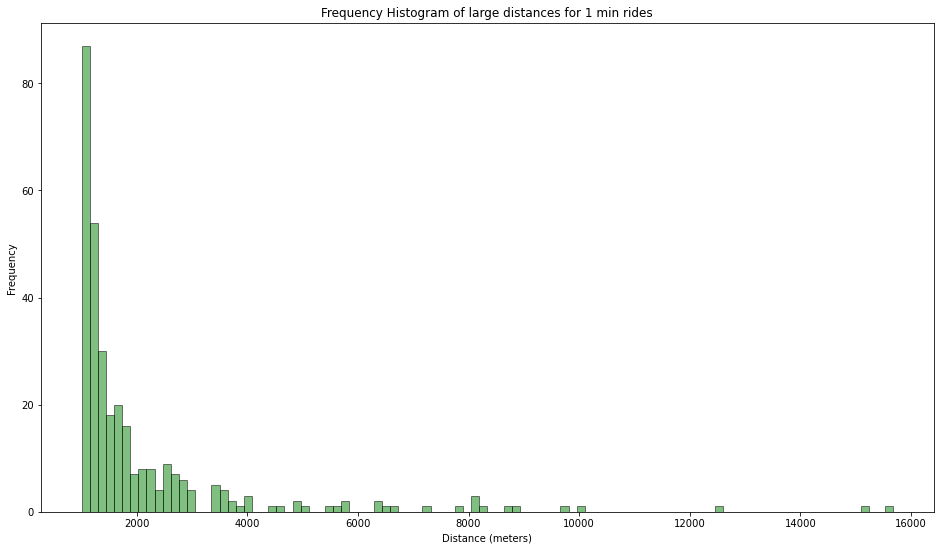

In [13]:
x = over_hard_cut["distance"]

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x, **kwargs, color='g', histtype='bar', edgecolor='black')
plt.gca().set(title='Frequency Histogram of large distances for 1 min rides', xlabel = 'Distance (meters)',ylabel='Frequency')

In [14]:
over_soft_cut

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
116    50.961947   7.003877  50.975264  6.990501  2020-07-04 21:27:02.335504   
118    50.977631   6.988100  50.956304  6.974359  2020-07-05 02:02:01.738319   
1814   50.919432   6.923560  50.932679  6.901131  2020-07-18 09:02:02.337021   
2583   50.957300   6.968119  50.955266  6.990617  2020-07-31 16:54:03.053795   
2821   50.977870   6.949031  51.000141  6.935396  2020-07-30 16:05:04.244171   
2837   50.997642   6.939239  50.975138  6.949969  2020-07-30 20:24:02.868489   
3030   50.943540   6.919895  50.896233  7.018962  2020-07-15 12:45:02.895478   
3410   50.936364   6.949023  50.917113  6.923311  2020-07-30 17:34:02.805941   
4828   50.924565   7.009012  50.938184  6.830792  2020-07-22 22:51:02.520372   
4829   50.938184   6.830792  50.927903  6.945935  2020-07-22 23:02:02.933355   
5738   50.943144   6.960408  50.964918  6.953845  2020-07-30 13:53:02.245245   
6428   50.925926   6.941398  50.909867  6.940860  2020-07-15 15:42:02.999516   
7856   50.958734   6.941751  50.968293  6.961333  2020-07-16 01:04:01.803986   
7876   50.968047   6.961252  50.959334  6.942241  2020-07-16 20:33:03.157246   
7925   50.970198   6.962701  50.959080  6.941826  2020-07-17 21:56:03.400569   
8051   50.994114   6.939467  51.006794  6.930479  2020-07-23 12:56:03.053161   
8052   51.006794   6.930479  51.023987  6.926209  2020-07-23 13:06:02.491875   
8058   51.017192   6.924609  50.987754  6.945123  2020-07-23 16:09:02.676274   
8776   50.998914   6.936122  51.016452  6.921073  2020-07-09 12:01:02.332851   
8787   51.063818   6.872134  51.057773  6.901309  2020-07-09 12:38:01.759394   
8791   51.050681   6.918979  51.034595  6.951990  2020-07-09 12:58:02.037849   
8838   50.914107   6.886968  50.906343  6.905770  2020-07-11 13:46:02.411185   
8902   50.891081   7.038677  50.892712  7.003517  2020-07-12 15:46:01.570063   
8904   50.893451   7.000231  50.902390  6.982968  2020-07-12 15:56:01.615638   
8910   50.909912   6.947904  50.915792  6.927139  2020-07-12 16:21:01.645635   
8928   50.935646   6.949123  50.920386  6.931627  2020-07-15 17:15:02.941902   
8954   50.953826   6.970905  50.939195  6.957444  2020-07-17 15:53:02.198024   
8969   50.953851   6.942122  50.961742  6.964146  2020-07-17 17:43:03.050755   
9059   50.936005   6.989083  50.933636  7.013029  2020-07-24 08:51:02.334633   
13150  50.928661   6.914829  50.941249  6.930289  2020-07-17 09:47:02.733484   
13952  48.534194   7.878492  48.550723  7.878645  2020-07-28 13:30:03.420824   
14483  50.975457   6.870038  50.949226  6.875845  2020-07-13 14:42:01.810911   
17152  50.930797   6.929940  50.921544  6.963156  2020-07-31 21:37:03.137055   
18143  50.916564   6.919243  50.932569  6.901406  2020-07-21 23:16:02.927491   
18164  50.922948   6.934339  50.946429  6.894901  2020-07-22 00:54:03.090106   
19030  50.969527   6.977026  50.957877  6.957455  2020-07-08 03:18:02.152356   
19880  50.938361   6.959974  50.998236  6.901480  2020-07-19 11:28:02.089424   
19953  50.934574   6.911577  50.935456  6.936221  2020-07-01 19:26:02.486218   
20005  50.939482   6.939952  50.953052  6.951534  2020-07-03 14:27:02.384349   
21004  50.937905   7.001331  50.920849  6.996681  2020-07-14 09:43:02.136495   
22645  50.942441   6.964716  50.926550  6.966331  2020-07-22 15:47:02.720292   
22716  50.970233   6.965954  50.950067  6.966042  2020-07-02 11:43:01.821444   
22721  50.935944   6.959798  50.899405  7.031264  2020-07-02 12:18:01.941705   
22725  50.898271   7.036087  50.937009  6.970736  2020-07-02 18:51:01.910730   
22812  50.968432   6.961344  50.958439  6.941798  2020-07-04 11:23:02.452479   
23700  50.969865   6.885952  50.942607  6.957052  2020-07-09 11:38:02.375299   
24370  50.875895   7.031328  50.938184  6.830792  2020-07-08 16:35:01.631031   
25218  50.953528   7.001238  50.943313  6.919493  2020-07-15 18:16:03.775075   
25263  50.908025   6.900787  50.936645  6.876047  2020-07-25 05:11:02.414482   
25692  

In [15]:
df[df["name"] == "BIKE 22351"]

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
2693  50.964348   7.019629  50.964101  7.019187  2020-07-02 20:00:02.729923   
2694  50.964101   7.019187  50.962071  7.004462  2020-07-03 12:56:01.487657   
2695  50.962071   7.004462  50.960028  6.998303  2020-07-03 13:33:01.474433   
2696  50.960028   6.998303  50.956715  7.004342  2020-07-03 16:18:01.559077   
2697  50.956715   7.004342  50.955808  7.005623  2020-07-05 09:45:03.403867   
2698  50.955808   7.005623  50.968863  6.969431  2020-07-05 16:51:01.722439   
2699  50.968863   6.969431  50.974584  6.969806  2020-07-05 19:35:01.688453   
2700  50.974584   6.969806  50.975404  6.973554  2020-07-06 06:37:02.121058   
2701  50.975404   6.973554  50.967206  6.962746  2020-07-06 09:35:02.087571   
2702  50.967206   6.962746  50.952917  6.937194  2020-07-06 09:50:02.205899   
2703  50.952917   6.937194  50.952428  6.929473  2020-07-06 11:54:02.534952   
2704  50.952428   6.929473  50.950776  6.924607  2020-07-06 17:32:02.265614   
2705  50.950776   6.924607  50.966523  6.913663  2020-07-06 19:51:02.018052   
2706  50.966523   6.913663  50.966825  6.912799  2020-07-06 21:21:02.041422   
2707  50.966825   6.912799  50.980746  6.895714  2020-07-06 23:16:01.449813   
2708  50.980746   6.895714  50.979514  6.896814  2020-07-09 10:08:01.942676   
2709  50.979514   6.896814  50.988747  6.892811  2020-07-09 15:09:02.046542   
2710  50.988747   6.892811  50.984860  6.887848  2020-07-09 16:25:01.520122   
2711  50.984860   6.887848  50.982816  6.897670  2020-07-09 16:46:01.463802   
2712  50.982816   6.897670  50.983125  6.886978  2020-07-09 17:01:02.422739   
2713  50.983125   6.886978  50.936292  6.945880  2020-07-10 14:23:01.828776   
2714  50.936292   6.945880  50.912833  6.944571  2020-07-10 15:21:01.536807   
2715  50.912833   6.944571  50.922519  6.915478  2020-07-10 15:55:02.045187   
2716  50.922519   6.915478  50.914752  6.944598  2020-07-10 18:08:02.026629   
2717  50.914752   6.944598  50.942302  6.957367  2020-07-10 19:04:01.958120   
2718  50.942302   6.957367  50.934712  6.956195  2020-07-10 19:27:02.991768   
2719  50.934712   6.956195  50.934130  6.961732  2020-07-11 00:43:01.958488   
2720  50.934130   6.961732  50.928472  6.936619  2020-07-11 14:12:02.234933   
2721  50.928472   6.936619  50.922369  6.915428  2020-07-11 15:20:02.489246   
2722  50.922369   6.915428  50.936566  6.947996  2020-07-11 16:25:02.227084   
2723  50.936566   6.947996  50.916104  6.926877  2020-07-11 17:12:01.948674   
2724  50.916104   6.926877  50.919888  6.917446  2020-07-11 18:02:01.650806   
2725  50.919888   6.917446  50.907453  6.941609  2020-07-11 18:53:02.392800   
2726  50.907453   6.941609  50.928140  6.942691  2020-07-11 19:35:02.222371   
2727  50.928140   6.942691  50.928125  6.942876  2020-07-11 20:22:02.566451   
2728  50.928125   6.942876  50.904989  6.942687  2020-07-11 21:03:02.189165   
2729  50.904989   6.942687  50.921173  6.932935  2020-07-11 22:31:03.001506   
2730  50.921173   6.932935  50.907626  6.919562  2020-07-11 23:32:02.455064   
2731  50.907626   6.919562  50.906900  6.974135  2020-07-12 00:38:02.212332   
2732  50.906900   6.974135  50.903646  6.949630  2020-07-12 18:05:02.070279   
2733  50.903646   6.949630  50.907788  6.973910  2020-07-12 19:09:01.838567   
2734  50.907788   6.973910  50.922535  6.967697  2020-07-13 21:29:02.999834   
2735  50.922535   6.967697  50.963421  6.975492  2020-07-14 00:44:02.976540   
2736  50.963421   6.975492  50.950255  6.956170  2020-07-14 08:04:03.038245   
2737  50.950255   6.956170  50.962864  6.974009  2020-07-14 08:31:02.128184   
2738  50.962864   6.974009  50.927698  6.929661  2020-07-14 09:25:02.981888   
2739  50.927698   6.929661  50.940832  6.943234  2020-07-14 13:36:03.154945   
2740  50.940832   6.943234  50.956528  6.961529  2020-07-14 16:34:02.807929   
2741  50.956528   6.961529  50.937276  6.940448  2020-07-15 14:22:02.962673   
2742  50.937276   6.940448  50.938835  6.940889  2020-07

In [16]:
previous_index = 0
previous_duration = df["ride_time_minutes"][0]
indexes_of_sequenced_minut_rides = [] #initialize list to save all connected 1 min ride indexes

for index, row in islice(df.iterrows(), 1, None): #iterate starting from second row 
    if (df["ride_time_minutes"][index] == 1.0) & (previous_duration == 1.0):
        if previous_index in indexes_of_sequenced_minut_rides: #checking if previous index is already saved in the list, in cases of multiple connected indexes it will already be added as current index in previous iteration
            indexes_of_sequenced_minut_rides.append(index) #if previous index exists in the list it was added in a previous itteration so just add current index
        else:
            indexes_of_sequenced_minut_rides.append(previous_index) #else if it was not added add it now
            indexes_of_sequenced_minut_rides.append(index)
    #when comparison of rows is done update "previous" variables to contain current values that will act as previus for next iteration
    previous_index = index 
    previous_duration = df["ride_time_minutes"][index]

In [17]:
indexes_of_sequenced_minut_rides

[45,
 46,
 92,
 93,
 94,
 95,
 116,
 117,
 118,
 119,
 120,
 258,
 259,
 262,
 263,
 332,
 333,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 644,
 645,
 646,
 686,
 687,
 735,
 736,
 770,
 771,
 788,
 789,
 1346,
 1347,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1736,
 1737,
 1738,
 1739,
 1740,
 1741,
 1742,
 1743,
 1744,
 1745,
 1746,
 1747,
 1748,
 1749,
 1750,
 1751,
 1752,
 1753,
 1754,
 1755,
 1756,
 1757,
 1758,
 1759,
 1760,
 1761,
 1762,
 1763,
 1764,
 1765,
 1766,
 1767,
 1768,
 1769,
 1770,
 1771,
 1772,
 1773,
 1774,
 1775,
 1776,
 1777,
 1778,
 1779,
 1780,
 1781,
 1782,
 1783,
 1784,
 1785,
 1786,
 1787,
 1788,
 1789,
 1790,
 1791,
 1792,
 1793,
 1794,
 1795,
 1796,
 1797,
 1798,
 1799,
 1800,
 1801,
 1802,
 1803,
 1804,
 1805,
 1806,
 1807,
 1808,
 1809,
 1810,
 1811,
 1812,
 1813,
 1814,
 1815,
 1816,
 1817,
 1818,
 1819,
 1820,
 1821,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1

In [18]:
df_from_indexes = df.iloc[indexes_of_sequenced_minut_rides]

In [19]:
len(df_from_indexes)

4194

In [20]:
df_from_indexes['name'].value_counts(dropna=False)

BIKE 21967    425
BIKE 21263    280
BIKE 22274    222
BIKE 21861    191
BIKE 22809    155
BIKE 22228    153
BIKE 21060    121
BIKE 22363    104
BIKE 22132    101
BIKE 21244     95
BIKE 21921     83
BIKE 21826     62
BIKE 22795     61
BIKE 21152     60
BIKE 21114     55
BIKE 22076     52
BIKE 22036     50
BIKE 21976     48
BIKE 22329     48
BIKE 21774     45
BIKE 22163     43
BIKE 22069     43
BIKE 22087     41
BIKE 22351     31
BIKE 22808     31
BIKE 22276     30
BIKE 22008     29
BIKE 22454     27
BIKE 22424     26
BIKE 21812     26
BIKE 22310     25
BIKE 21054     23
BIKE 22794     23
BIKE 22101     21
BIKE 21834     20
BIKE 22337     20
BIKE 21344     20
BIKE 22019     20
BIKE 21593     17
BIKE 21382     17
BIKE 21007     16
BIKE 21563     16
BIKE 21998     16
BIKE 22139     16
BIKE 22175     16
BIKE 22304     16
BIKE 22214     15
BIKE 21673     15
BIKE 21284     14
BIKE 22970     14
BIKE 22824     14
BIKE 22040     13
BIKE 21259     13
BIKE 21556     13
BIKE 22185     13
BIKE 21577

In [21]:
df[df['name']== "BIKE 21967"] 

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
49415  50.963883   6.957249  50.951013  6.962107  2020-07-01 08:49:01.562393   
49416  50.951013   6.962107  50.968935  6.960303  2020-07-02 03:25:01.626075   
49417  50.968935   6.960303  50.967349  6.960326  2020-07-02 21:56:03.253063   
49418  50.967349   6.960326  50.967423  6.960337  2020-07-03 11:39:01.512224   
49419  50.967423   6.960337  50.944787  6.957929  2020-07-03 12:51:01.822572   
49420  50.944787   6.957929  50.943549  6.959905  2020-07-03 15:22:01.862978   
49421  50.943549   6.959905  50.930039  6.939402  2020-07-03 15:30:03.276462   
49422  50.930039   6.939402  50.924356  6.918464  2020-07-03 15:54:02.101726   
49423  50.924356   6.918464  50.926533  6.924279  2020-07-03 16:46:02.131686   
49424  50.926533   6.924279  50.927424  6.945294  2020-07-03 18:16:02.860655   
49425  50.927424   6.945294  50.934316  6.977574  2020-07-03 18:31:01.589263   
49426  50.934316   6.977574  50.933376  6.977045  2020-07-03 19:55:02.762865   
49427  50.933376   6.977045  50.933954  6.977383  2020-07-03 19:57:01.869655   
49428  50.933954   6.977383  50.929220  6.957599  2020-07-03 23:55:01.548091   
49429  50.929220   6.957599  50.910942  6.942673  2020-07-04 02:48:02.152175   
49430  50.910942   6.942673  50.926669  6.938246  2020-07-04 08:56:02.284289   
49431  50.926669   6.938246  50.919442  6.919650  2020-07-04 09:40:03.376334   
49432  50.919442   6.919650  50.922651  6.922517  2020-07-04 12:42:02.311827   
49433  50.922651   6.922517  50.949522  6.915923  2020-07-04 13:45:02.201570   
49434  50.949522   6.915923  50.940163  6.938193  2020-07-04 14:15:01.668128   
49435  50.940163   6.938193  50.946321  6.922263  2020-07-04 16:31:02.482777   
49436  50.946321   6.922263  50.932965  6.942236  2020-07-04 17:17:01.547167   
49437  50.932965   6.942236  50.928178  6.944635  2020-07-05 00:53:02.350753   
49438  50.928178   6.944635  50.911167  6.941136  2020-07-05 03:50:01.821031   
49439  50.911167   6.941136  50.916205  6.947921  2020-07-05 09:27:02.195709   
49440  50.916205   6.947921  50.931760  6.933403  2020-07-05 14:02:01.972048   
49441  50.931760   6.933403  50.913691  6.932871  2020-07-05 14:36:02.029488   
49442  50.913691   6.932871  50.921192  6.959410  2020-07-05 16:21:01.825122   
49443  50.921192   6.959410  50.922152  6.907246  2020-07-05 17:09:02.413432   
49444  50.922152   6.907246  50.898938  6.952896  2020-07-05 19:57:02.316036   
49445  50.898938   6.952896  50.925443  6.965087  2020-07-07 21:03:02.022026   
49446  50.925443   6.965087  50.897969  6.951755  2020-07-08 00:09:01.659487   
49447  50.897969   6.951755  50.901405  6.965043  2020-07-08 08:25:02.140753   
49448  50.901405   6.965043  50.907761  6.936787  2020-07-08 14:49:01.596390   
49449  50.907761   6.936787  50.935706  6.922653  2020-07-08 18:55:01.670301   
49450  50.935706   6.922653  50.934257  6.922842  2020-07-08 19:30:02.027699   
49451  50.934257   6.922842  50.936542  6.985982  2020-07-09 07:00:02.600390   
49452  50.936542   6.985982  50.934932  6.997465  2020-07-09 13:53:02.151100   
49453  50.934932   6.997465  50.936174  6.987213  2020-07-09 14:37:02.105056   
49454  50.936174   6.987213  50.938669  6.978490  2020-07-09 15:13:02.074493   
49455  50.938669   6.978490  50.955993  6.898619  2020-07-09 15:52:01.987405   
49456  50.955993   6.898619  50.954876  6.884745  2020-07-09 22:10:02.800731   
49457  50.954876   6.884745  50.950982  6.908278  2020-07-13 09:17:01.997239   
49458  50.950982   6.908278  50.953176  6.874995  2020-07-13 17:57:02.781098   
49459  50.953176   6.874995  50.949487  6.906779  2020-07-14 05:27:02.079969   
49460  50.949487   6.906779  50.953139  6.875014  2020-07-15 14:20:02.558254   
49461  50.953139   6.875014  50.946186  6.889625  2020-07-16 09:39:03.112234   
49462  50.946186   6.889625  50.935558  6.946364  2020-07-16 16:53:03.012610   
49463  50.935558   6.946364  50.910004  6.916960  2020-07-16 18:25:02.537111   
49464  

In [22]:
not_sequenced_minut_rides = minut_rides.drop(indexes_of_sequenced_minut_rides)
not_sequenced_minut_rides

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
35     50.936354   6.954177  50.936100  6.952745  2020-07-02 10:29:02.413969   
52     50.909512   6.945691  50.909290  6.945591  2020-07-09 18:09:02.719228   
67     50.929001   6.990766  50.928849  6.990550  2020-07-03 16:38:02.308515   
88     50.937356   6.979865  50.937013  6.979973  2020-07-09 08:03:02.193489   
90     50.911096   6.932630  50.911103  6.932931  2020-07-09 17:08:01.558733   
110    50.961855   7.004888  50.962097  7.004782  2020-07-02 17:50:01.849300   
200    50.975260   6.928782  50.975388  6.928978  2020-07-30 19:39:02.924397   
222    50.961778   6.946547  50.960511  6.946424  2020-07-20 08:03:02.041710   
226    50.978288   6.950105  50.978487  6.950331  2020-07-20 11:13:03.308191   
271    50.931606   6.934294  50.931706  6.934414  2020-07-31 19:10:02.523156   
311    50.936669   6.933031  50.937056  6.932769  2020-07-02 14:56:02.001805   
324    50.932343   6.892879  50.932213  6.893836  2020-07-04 17:50:01.749074   
363    50.946823   6.939862  50.946677  6.939860  2020-07-13 02:10:02.854116   
396    50.939030   6.951191  50.939099  6.950864  2020-07-30 16:04:02.882755   
417    50.952170   6.995226  50.952234  6.995376  2020-07-06 18:36:02.357183   
423    50.947380   6.986390  50.948693  6.986418  2020-07-08 01:55:02.051192   
430    50.942298   6.973621  50.941432  6.973327  2020-07-10 19:33:02.623905   
433    50.957287   6.989336  50.957788  6.989020  2020-07-11 23:26:02.135732   
480    50.949322   7.007707  50.949222  7.008115  2020-07-28 17:37:02.232325   
503    50.916945   6.923722  50.917077  6.923216  2020-07-06 16:02:01.525899   
513    50.920983   6.935160  50.921420  6.934635  2020-07-08 11:37:02.041643   
519    50.924923   6.936370  50.925176  6.936556  2020-07-09 17:36:02.689887   
527    50.937191   6.890373  50.937297  6.890221  2020-07-10 16:10:02.453149   
559    50.942943   6.950200  50.943071  6.950542  2020-07-15 10:57:02.394177   
567    50.957862   7.012413  50.957760  7.012244  2020-07-17 17:09:02.480072   
572    50.944901   6.937592  50.944875  6.936801  2020-07-21 20:20:02.261178   
580    50.966011   6.979044  50.965802  6.978847  2020-07-22 20:32:02.905494   
594    50.947920   6.952102  50.947979  6.951936  2020-07-26 23:07:03.130955   
613    50.947650   6.944420  50.947613  6.944231  2020-07-05 20:02:01.904717   
630    50.944238   6.946494  50.945096  6.946095  2020-07-08 06:08:02.027715   
655    50.943750   6.908556  50.943630  6.908717  2020-07-13 06:54:02.013727   
659    50.906294   6.956675  50.905970  6.956704  2020-07-13 17:53:02.754235   
676    50.981895   6.944541  50.981831  6.944337  2020-07-29 18:12:03.431869   
680    50.944506   6.952011  50.945123  6.952645  2020-07-30 14:07:02.798782   
711    50.955456   6.964016  50.955499  6.964223  2020-07-02 21:27:01.985136   
716    50.949438   6.962054  50.949181  6.961867  2020-07-03 18:45:02.009625   
718    50.937881   6.945627  50.938245  6.945147  2020-07-04 00:06:02.041472   
739    50.933928   6.904382  50.934019  6.904196  2020-07-13 20:23:03.477119   
744    50.923647   6.979931  50.923640  6.979753  2020-07-14 13:48:02.513787   
750    50.933187   6.950228  50.933158  6.950065  2020-07-17 21:00:04.451363   
758    50.941059   6.962799  50.941988  6.962731  2020-07-18 18:24:02.637840   
797    50.982086   6.943024  50.982256  6.942946  2020-07-23 14:28:03.555677   
806    50.955850   6.918436  50.955771  6.918552  2020-07-24 22:52:02.654989   
813    50.943154   6.943244  50.943555  6.942889  2020-07-01 10:42:02.269889   
825    50.947064   6.988659  50.947319  6.988572  2020-07-04 01:28:01.555489   
835    50.906618   6.977840  50.906693  6.978701  2020-07-05 15:30:02.374133   
840    50.931638   6.962845  50.930930  6.961934  2020-07-06 16:03:02.470933   
842    50.943000   6.959889  50.942727  6.960548  2020-07-06 16:25:02.463690   
865    50.953089   6.951190  50.952315  6.951650  2020-07-10 19:47:01.797400   
867    

In [23]:
len(not_sequenced_minut_rides)

2965

In [24]:
not_sequenced_minut_rides["name"].value_counts(dropna=False)

BIKE 21822    15
BIKE 21263    12
BIKE 22327    11
BIKE 22231    11
BIKE 21020    11
BIKE 22228    11
BIKE 22813    11
BIKE 22050    10
BIKE 22408    10
BIKE 22049    10
BIKE 22146    10
BIKE 22172    10
BIKE 21083    10
BIKE 22235    10
BIKE 22728    10
BIKE 21593    10
BIKE 21643    10
BIKE 21145    10
BIKE 21582    10
BIKE 22738    10
BIKE 21176    10
BIKE 21244    10
BIKE 21070     9
BIKE 22749     9
BIKE 22786     9
BIKE 21839     9
BIKE 22437     9
BIKE 22229     9
BIKE 21639     9
BIKE 21461     9
BIKE 22420     9
BIKE 21905     9
BIKE 21490     9
BIKE 22496     8
BIKE 21158     8
BIKE 22389     8
BIKE 21381     8
BIKE 22117     8
BIKE 22035     8
BIKE 22369     8
BIKE 22295     8
BIKE 22040     8
BIKE 21027     8
BIKE 22745     8
BIKE 22189     8
BIKE 21607     8
BIKE 21908     8
BIKE 22482     8
BIKE 21774     8
BIKE 21744     8
BIKE 22234     8
BIKE 22023     8
BIKE 21935     8
BIKE 21417     8
BIKE 21821     8
BIKE 21631     8
BIKE 22918     8
BIKE 22133     8
BIKE 22442    

In [25]:
df[df['name']== "BIKE 21822"] 

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
21835  50.961071   7.008375  50.970568  7.018052  2020-07-02 13:42:01.867080   
21836  50.970568   7.018052  50.957211  7.011587  2020-07-02 16:12:03.624285   
21837  50.957211   7.011587  50.951581  7.005859  2020-07-02 20:24:02.565738   
21838  50.951581   7.005859  50.951376  7.005243  2020-07-02 23:20:02.813396   
21839  50.951376   7.005243  50.946064  6.997784  2020-07-03 09:11:02.600570   
21840  50.946064   6.997784  50.931040  6.996469  2020-07-03 18:37:03.282251   
21841  50.931040   6.996469  50.918509  6.978132  2020-07-04 18:50:01.602232   
21842  50.918509   6.978132  50.937330  6.961164  2020-07-04 20:25:02.459776   
21843  50.937330   6.961164  50.937071  6.961387  2020-07-04 23:30:01.810413   
21844  50.937071   6.961387  50.931003  6.997173  2020-07-05 02:27:01.702884   
21845  50.931003   6.997173  50.944497  6.971850  2020-07-05 05:49:02.295417   
21846  50.944497   6.971850  50.931814  6.997240  2020-07-05 14:41:02.211530   
21847  50.931814   6.997240  50.898702  6.951207  2020-07-05 18:33:01.926964   
21848  50.898702   6.951207  50.904463  6.956953  2020-07-07 12:13:01.571609   
21849  50.904463   6.956953  50.912648  6.963444  2020-07-07 13:43:02.150115   
21850  50.912648   6.963444  50.890216  7.000415  2020-07-07 14:44:02.601361   
21851  50.890216   7.000415  50.938131  6.959762  2020-07-09 11:25:02.672475   
21852  50.938131   6.959762  50.928450  6.914927  2020-07-09 17:43:01.760117   
21853  50.928450   6.914927  50.919255  6.926283  2020-07-09 18:36:02.161581   
21854  50.919255   6.926283  50.937512  6.882409  2020-07-09 19:03:01.715468   
21855  50.937512   6.882409  50.963808  6.938873  2020-07-10 13:55:01.882581   
21856  50.963808   6.938873  50.966154  6.938964  2020-07-10 18:03:01.714848   
21857  50.966154   6.938964  50.952140  6.918959  2020-07-11 16:59:02.349412   
21858  50.952140   6.918959  50.954932  6.921943  2020-07-12 12:34:01.930214   
21859  50.954932   6.921943  50.939766  6.946527  2020-07-12 14:10:02.307459   
21860  50.939766   6.946527  50.912397  6.939324  2020-07-12 18:02:01.597191   
21861  50.912397   6.939324  50.912502  6.939707  2020-07-13 04:26:02.059096   
21862  50.912502   6.939707  50.925322  6.918626  2020-07-13 06:40:01.918178   
21863  50.925322   6.918626  50.925400  6.931505  2020-07-13 17:13:03.235284   
21864  50.925400   6.931505  50.925248  6.930043  2020-07-13 19:45:03.134169   
21865  50.925248   6.930043  50.920957  6.918937  2020-07-13 19:48:03.816665   
21866  50.920957   6.918937  50.921950  6.920660  2020-07-13 21:02:03.107226   
21867  50.921950   6.920660  50.935991  6.944560  2020-07-14 09:25:02.981888   
21868  50.935991   6.944560  50.913797  6.942055  2020-07-14 13:47:02.539534   
21869  50.913797   6.942055  50.898519  6.963339  2020-07-14 14:27:02.592909   
21870  50.898519   6.963339  50.937038  6.959243  2020-07-14 17:36:03.405622   
21871  50.937038   6.959243  50.918192  6.978806  2020-07-15 15:07:02.983286   
21872  50.918192   6.978806  50.918195  6.978488  2020-07-15 17:24:02.462858   
21873  50.918195   6.978488  50.926533  6.965717  2020-07-16 07:31:02.859005   
21874  50.926533   6.965717  50.927250  6.965914  2020-07-16 07:50:02.844735   
21875  50.927250   6.965914  50.913329  6.971374  2020-07-16 08:20:03.100492   
21876  50.913329   6.971374  50.937612  6.969590  2020-07-16 08:50:03.195777   
21877  50.937612   6.969590  50.927672  6.908944  2020-07-17 10:33:03.080622   
21878  50.927672   6.908944  50.969209  6.978085  2020-07-17 13:06:02.551583   
21879  50.969209   6.978085  50.972777  6.977377  2020-07-17 17:38:03.087579   
21880  50.972777   6.977377  50.967298  6.980637  2020-07-17 18:32:03.016774   
21881  50.967298   6.980637  50.944379  6.960913  2020-07-18 09:43:02.297003   
21882  50.944379   6.960913  50.944009  6.960754  2020-07-18 12:51:03.248812   
21883  50.944009   6.960754  50.927493  6.957653  2020-07-18 15:38:02.823508   
21884  

In [26]:
no_standing_before_minut_rides = []
for index,row in not_sequenced_minut_rides.iterrows():
    if (row["ride_time_minutes"] == 1) & (row["standing_before_ride"] ==0):
        no_standing_before_minut_rides.append(index)

In [27]:
len(no_standing_before_minut_rides)

1470

In [28]:
7159 - 4194 - 1470

1495

In [29]:
remaining_minut_rides = not_sequenced_minut_rides.drop(no_standing_before_minut_rides)
remaining_minut_rides

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
67     50.929001   6.990766  50.928849  6.990550  2020-07-03 16:38:02.308515   
88     50.937356   6.979865  50.937013  6.979973  2020-07-09 08:03:02.193489   
110    50.961855   7.004888  50.962097  7.004782  2020-07-02 17:50:01.849300   
222    50.961778   6.946547  50.960511  6.946424  2020-07-20 08:03:02.041710   
226    50.978288   6.950105  50.978487  6.950331  2020-07-20 11:13:03.308191   
271    50.931606   6.934294  50.931706  6.934414  2020-07-31 19:10:02.523156   
311    50.936669   6.933031  50.937056  6.932769  2020-07-02 14:56:02.001805   
417    50.952170   6.995226  50.952234  6.995376  2020-07-06 18:36:02.357183   
430    50.942298   6.973621  50.941432  6.973327  2020-07-10 19:33:02.623905   
480    50.949322   7.007707  50.949222  7.008115  2020-07-28 17:37:02.232325   
503    50.916945   6.923722  50.917077  6.923216  2020-07-06 16:02:01.525899   
513    50.920983   6.935160  50.921420  6.934635  2020-07-08 11:37:02.041643   
519    50.924923   6.936370  50.925176  6.936556  2020-07-09 17:36:02.689887   
527    50.937191   6.890373  50.937297  6.890221  2020-07-10 16:10:02.453149   
567    50.957862   7.012413  50.957760  7.012244  2020-07-17 17:09:02.480072   
580    50.966011   6.979044  50.965802  6.978847  2020-07-22 20:32:02.905494   
594    50.947920   6.952102  50.947979  6.951936  2020-07-26 23:07:03.130955   
655    50.943750   6.908556  50.943630  6.908717  2020-07-13 06:54:02.013727   
659    50.906294   6.956675  50.905970  6.956704  2020-07-13 17:53:02.754235   
676    50.981895   6.944541  50.981831  6.944337  2020-07-29 18:12:03.431869   
680    50.944506   6.952011  50.945123  6.952645  2020-07-30 14:07:02.798782   
711    50.955456   6.964016  50.955499  6.964223  2020-07-02 21:27:01.985136   
716    50.949438   6.962054  50.949181  6.961867  2020-07-03 18:45:02.009625   
739    50.933928   6.904382  50.934019  6.904196  2020-07-13 20:23:03.477119   
797    50.982086   6.943024  50.982256  6.942946  2020-07-23 14:28:03.555677   
806    50.955850   6.918436  50.955771  6.918552  2020-07-24 22:52:02.654989   
825    50.947064   6.988659  50.947319  6.988572  2020-07-04 01:28:01.555489   
835    50.906618   6.977840  50.906693  6.978701  2020-07-05 15:30:02.374133   
867    50.952327   6.951522  50.952489  6.951475  2020-07-10 20:55:02.434300   
903    50.957301   7.012038  50.957136  7.012024  2020-07-11 22:18:02.432478   
959    50.921289   6.937769  50.921225  6.937575  2020-07-07 20:49:02.796336   
965    50.930894   6.907941  50.930633  6.907940  2020-07-08 20:24:01.540514   
1014   50.915025   6.942705  50.914745  6.942459  2020-07-24 12:34:03.374818   
1022   50.928316   6.931203  50.928595  6.931342  2020-07-30 13:33:02.937443   
1032   50.946096   6.997603  50.946457  6.997523  2020-07-07 07:38:01.789751   
1153   50.959355   6.995343  50.959687  6.996042  2020-07-11 13:24:02.211673   
1202   50.958925   6.952686  50.959137  6.952788  2020-07-12 13:07:02.279783   
1303   50.929650   6.997430  50.928462  6.997630  2020-07-25 04:54:02.999385   
1331   50.928897   6.935930  50.928888  6.936422  2020-07-06 17:39:02.147203   
1338   50.923430   6.923131  50.922832  6.922962  2020-07-07 15:09:03.317917   
1341   50.918663   6.912041  50.919915  6.912142  2020-07-07 18:46:02.743282   
1402   50.907611   6.937643  50.907152  6.936974  2020-07-28 17:34:03.317980   
1422   50.962227   7.003650  50.962247  7.003864  2020-07-03 16:46:02.131686   
1430   50.971849   7.005826  50.971832  7.006543  2020-07-04 16:36:02.209624   
1462   50.960415   6.943865  50.960559  6.943789  2020-07-13 17:51:02.202243   
1500   50.930581   6.939486  50.930730  6.939271  2020-07-25 16:21:02.405447   
1526   50.938849   6.992341  50.938973  6.992186  2020-07-30 19:06:03.454692   
1598   50.990304   6.890769  50.990472  6.890769  2020-07-30 04:02:02.009356   
1696   50.966539   6.957831  50.966175  6.957906  2020-07-04 19:12:03.621902   
1857   

### Repeat soft and hard cut test 

In [30]:
over_soft_cut2 = remaining_minut_rides[remaining_minut_rides["distance"] > 1500]
len(over_soft_cut2)

26

In [31]:
over_hard_cut2 = remaining_minut_rides[remaining_minut_rides["distance"] > 1000]
len(over_hard_cut2)

38

[Text(0.5, 1.0, 'Frequency Histogram of large distances for 1 min rides'),
 Text(0.5, 0, 'Distance (meters)'),
 Text(0, 0.5, 'Frequency')]

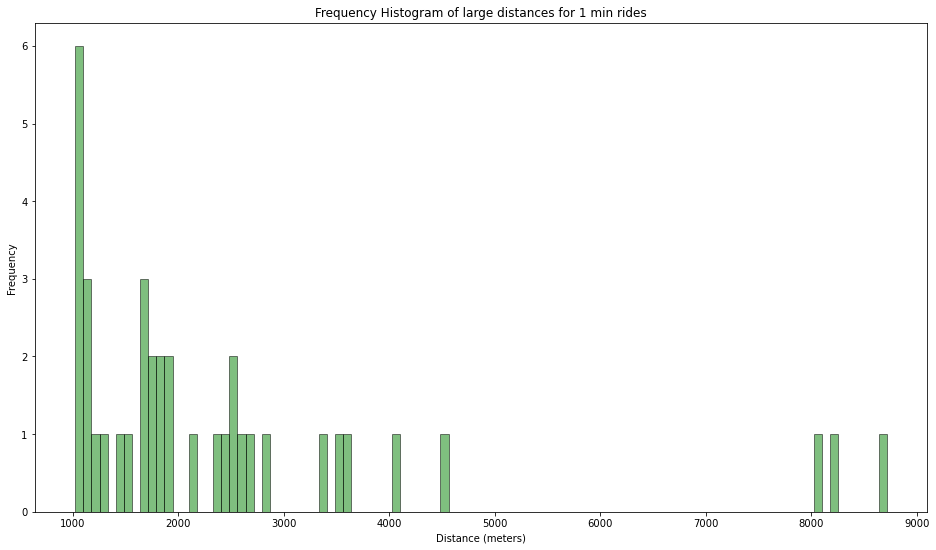

In [32]:
x = over_hard_cut2["distance"]

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x, **kwargs, color='g', histtype='bar', edgecolor='black')
plt.gca().set(title='Frequency Histogram of large distances for 1 min rides', xlabel = 'Distance (meters)',ylabel='Frequency')

In [33]:
over_hard_cut2

lat_begin  lng_begin    lat_end   lng_end                  ride_begin  \
3030   50.943540   6.919895  50.896233  7.018962  2020-07-15 12:45:02.895478   
3410   50.936364   6.949023  50.917113  6.923311  2020-07-30 17:34:02.805941   
5738   50.943144   6.960408  50.964918  6.953845  2020-07-30 13:53:02.245245   
7251   50.949988   6.916796  50.954935  6.930274  2020-07-23 00:56:01.976278   
8218   50.928726   6.915160  50.938480  6.905415  2020-07-03 09:10:01.493098   
8752   50.935368   6.953084  50.936025  6.937608  2020-07-07 18:08:02.066947   
8853   50.948238   6.944480  50.938396  6.938134  2020-07-11 15:52:01.801231   
8954   50.953826   6.970905  50.939195  6.957444  2020-07-17 15:53:02.198024   
9059   50.936005   6.989083  50.933636  7.013029  2020-07-24 08:51:02.334633   
13118  50.896770   6.950984  50.906851  6.951496  2020-07-17 17:12:03.193839   
13150  50.928661   6.914829  50.941249  6.930289  2020-07-17 09:47:02.733484   
15000  50.954717   6.930678  50.950364  6.916775  2020-07-22 23:37:02.175769   
21004  50.937905   7.001331  50.920849  6.996681  2020-07-14 09:43:02.136495   
21632  50.914597   6.930377  50.907519  6.941883  2020-07-08 19:10:03.441694   
22645  50.942441   6.964716  50.926550  6.966331  2020-07-22 15:47:02.720292   
25263  50.908025   6.900787  50.936645  6.876047  2020-07-25 05:11:02.414482   
26772  50.963972   6.951444  50.978251  6.945681  2020-07-11 23:44:02.004606   
27559  50.962539   7.003466  50.971967  7.006397  2020-07-22 13:47:01.926664   
28908  50.934854   6.939260  50.912507  6.945828  2020-07-02 22:23:02.437205   
31739  50.925264   6.922720  50.922115  6.899712  2020-07-23 12:24:03.089350   
31897  50.895376   6.974208  50.913194  6.961424  2020-07-12 15:12:02.172718   
32823  50.954833   6.981271  50.961439  7.000828  2020-07-23 15:46:02.113396   
35630  50.924538   6.944859  50.941668  6.972101  2020-07-07 07:48:01.475254   
37276  50.988383   6.909663  50.920188  6.955886  2020-07-25 01:29:02.080252   
38475  50.923688   6.904993  50.915359  6.935769  2020-07-22 18:02:03.024622   
38643  50.963307   6.953818  50.976693  6.969336  2020-07-02 14:03:01.461767   
40604  50.936488   6.935517  50.910922  6.961537  2020-07-05 01:13:02.371358   
46428  50.940190   6.932598  50.951709  6.900134  2020-07-23 07:58:02.832223   
47010  50.936769   6.939497  50.966589  6.957562  2020-07-19 00:37:02.395290   
47234  50.950356   6.930615  50.928039  6.928174  2020-07-10 00:50:01.859679   
48396  50.939969   6.932866  50.982259  6.839216  2020-07-19 22:28:02.523377   
48955  50.938365   6.932717  50.934184  6.917355  2020-07-26 00:06:02.300512   
48959  50.937305   6.924877  50.945181  6.932383  2020-07-26 17:55:01.901758   
48971  50.931950   6.917868  50.943848  6.924956  2020-07-27 09:51:03.069511   
56810  50.937477   6.880341  50.942188  6.938065  2020-07-23 21:14:02.757020   
57970  50.924475   6.922806  50.933099  6.917127  2020-07-22 09:20:03.005695   
61124  50.971965   7.006349  50.948518  6.954191  2020-07-06 11:17:02.410683   
62450  50.968912   6.939427  50.970074  6.913610  2020-07-11 09:43:02.024613   

                         ride_end  ride_time_minutes  distance  uid_begin  \
3030   2020-07-15 12:46:02.866982                1.0    8715.0   32548236   
3410   2020-07-30 17:35:02.972062                1.0    2799.0   33413364   
5738   2020-07-30 13:54:02.448044                1.0    2465.0   32940316   
7251   2020-07-23 00:57:02.745048                1.0    1093.0   32979714   
8218   2020-07-03 09:11:02.600570                1.0    1282.0   31904102   
8752   2020-07-07 18:09:01.582332                1.0    1087.0   32155464   
8853   2020-07-11 15:53:02.643765                1.0    1182.0   32344070   
8954   2020-07-17 15:54:02.467506                1.0    1881.0   32670027   
9059   2020-07-24 08:52:02.703104                1.0    1699.0   33050254   
13118  2020-07-17 17:13:02.549380                1.0    1122.0   32531299   
13150  2020-07-17 09:48:03.021399      

In [34]:
over_hard_cut_indexes = over_hard_cut2.index.to_list()

### From original df we drop indexes from 3 lists: sequenced min rides, no standing before min rides and over the hard cut indexes

In [35]:
new_df = df.drop(indexes_of_sequenced_minut_rides)
new_df = new_df.drop(no_standing_before_minut_rides)
new_df = new_df.drop(over_hard_cut_indexes)

In [36]:
sr= new_df.groupby('ride_time_minutes')['distance'].apply(list) 
sr

ride_time_minutes
1.0        [23.0, 39.0, 28.0, 141.0, 27.0, 14.0, 47.0, 13...
2.0        [16.0, 4.0, 193.0, 24.0, 9.0, 2917.0, 30.0, 5....
3.0        [238.0, 28.0, 18.0, 9.0, 1173.0, 18.0, 54.0, 5...
4.0        [376.0, 224.0, 24.0, 246.0, 76.0, 61.0, 240.0,...
5.0        [610.0, 599.0, 341.0, 135.0, 246.0, 477.0, 541...
6.0        [13.0, 922.0, 31.0, 479.0, 361.0, 638.0, 587.0...
7.0        [1238.0, 762.0, 924.0, 945.0, 473.0, 715.0, 17...
8.0        [437.0, 261.0, 256.0, 962.0, 908.0, 859.0, 102...
9.0        [1389.0, 1188.0, 597.0, 1097.0, 1677.0, 596.0,...
10.0       [597.0, 1118.0, 1095.0, 1110.0, 1211.0, 1218.0...
11.0       [1870.0, 782.0, 1040.0, 1861.0, 794.0, 1839.0,...
12.0       [758.0, 1369.0, 1669.0, 1607.0, 573.0, 2384.0,...
13.0       [783.0, 789.0, 2006.0, 1729.0, 1701.0, 1741.0,...
14.0       [3069.0, 1368.0, 2376.0, 2515.0, 525.0, 1965.0...
15.0       [2261.0, 1221.0, 797.0, 2116.0, 811.0, 2291.0,...
16.0       [2751.0, 3629.0, 167.0, 590.0, 1266.0, 1406.0,...
17.0  

In [37]:
count_of_distances = (sr.apply(len)).to_list()

In [38]:
grouped_distances_df = sr.to_frame()
grouped_distances_df.insert(1, 'count', count_of_distances) #adding count of the values in distance
grouped_distances_df.head()

distance  count
ride_time_minutes                                                          
1.0                [23.0, 39.0, 28.0, 141.0, 27.0, 14.0, 47.0, 13...   1457
2.0                [16.0, 4.0, 193.0, 24.0, 9.0, 2917.0, 30.0, 5....     37
3.0                [238.0, 28.0, 18.0, 9.0, 1173.0, 18.0, 54.0, 5...    227
4.0                [376.0, 224.0, 24.0, 246.0, 76.0, 61.0, 240.0,...    545
5.0                [610.0, 599.0, 341.0, 135.0, 246.0, 477.0, 541...   1061

In [39]:
plot_df = grouped_distances_df[grouped_distances_df.index < 1000]

<BarContainer object of 888 artists>

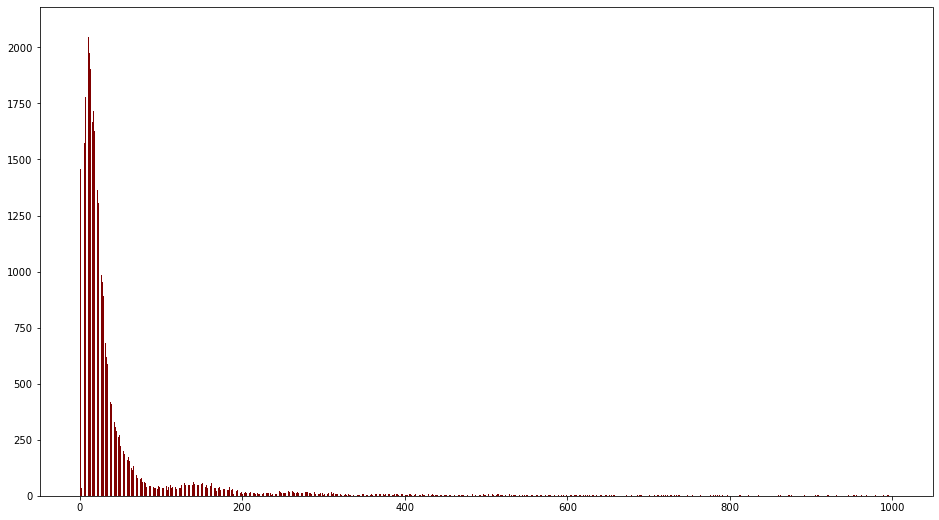

In [40]:
plt.bar(plot_df.index, plot_df["count"], color ='maroon', width = 0.6)